In [3]:
!pip install wget folium pygal cufflinks altair

In [4]:
import os
import json
import warnings
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as py
from plotly import tools, subplots

In [6]:
import folium

In [7]:
import pygal
from pygal import Config
from pygal.style import DefaultStyle, DarkSolarizedStyle, NeonStyle

In [8]:
import altair as alt

In [9]:
import cufflinks as cf

In [10]:
from IPython.display import Image
from IPython.display import Markdown
from IPython.display import SVG, display

# Load Data

Download COVID-19 data from John Hopkins University on Github.

In [11]:
urls = [
    # global confirmed cases
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    # global death cases
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv']

for url in urls:
    file = wget.download(url)

In [12]:
cases = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [13]:
deaths = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [14]:
print("****GLOBAL CONFIRMED CASES*****")
print("# rows: {}".format(cases.shape[0]))
print("# columns: {}".format(cases.shape[1]))
print("****GLOBAL DEATHS*****")
print("# rows: {}".format(deaths.shape[0]))
print("# columns: {}".format(deaths.shape[1]))

****GLOBAL CONFIRMED CASES*****
# rows: 289
# columns: 1147
****GLOBAL DEATHS*****
# rows: 289
# columns: 1147


In [15]:
print("****All Columns Global Confirmed Cases****:\n", cases.columns)
print("\n")
print("****All Columns Gobal Deaths****:\n", deaths.columns)

****All Columns Global Confirmed Cases****:
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


****All Columns Gobal Deaths****:
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


In [16]:
print("Global Confirmed Cases Types:\n", cases.dtypes)
print("\nGlobal Deaths Types:\n", deaths.dtypes)

Global Confirmed Cases Types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

Global Deaths Types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object


In [17]:
cases.describe(include='all')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,91,289,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
unique,91,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Australian Capital Territory,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,19.718719,22.182084,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,NaN,NaN,25.956609,77.870931,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,NaN,NaN,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,NaN,NaN,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,NaN,NaN,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06


In [18]:
deaths.describe(include='all')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,91,289,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
unique,91,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Australian Capital Territory,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,19.718719,22.182084,0.058824,0.062284,0.089965,0.145329,0.193772,0.283737,...,2.378091e+04,2.378707e+04,2.379249e+04,2.379697e+04,2.379793e+04,2.379844e+04,2.379971e+04,2.380290e+04,2.380790e+04,2.381246e+04
std,NaN,NaN,25.956609,77.870931,1.000000,1.001525,1.413797,2.353998,3.060245,4.471644,...,9.337339e+04,9.341836e+04,9.345110e+04,9.347703e+04,9.347884e+04,9.347810e+04,9.348106e+04,9.349767e+04,9.352985e+04,9.355567e+04
min,NaN,NaN,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
50%,NaN,NaN,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.440000e+02,9.440000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02
75%,NaN,NaN,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.727000e+03,8.727000e+03


In [19]:
print("GLOBAL CONFIRMED CASES")
cases.info()
print(cases.isnull().sum().sort_values(ascending=False))
print("\n GLOBAL DEATH CASES")
deaths.info()
print(deaths.isnull().sum().sort_values(ascending=False))

GLOBAL CONFIRMED CASES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB
Province/State    198
Lat                 2
Long                2
2/25/22             0
2/24/22             0
                 ... 
2/2/21              0
2/1/21              0
1/31/21             0
1/30/21             0
2/7/21              0
Length: 1147, dtype: int64

 GLOBAL DEATH CASES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB
Province/State    198
Lat                 2
Long                2
2/25/22             0
2/24/22             0
                 ... 
2/2/21              0
2/1/21              0
1/31/21             0
1/30/21             0
2/7/21              0
Length: 1147, dtype: int64


In [20]:
date = cases.columns[4:]
cases_df = cases.melt(id_vars=['Province/State','Country/Region','Lat','Long'],
                      value_vars = date, var_name = 'Date', value_name = 'Confirmed Cases')

deaths_df = deaths.melt(id_vars=['Province/State', 'Country/Region','Lat','Long'],
                        value_vars = date, var_name = 'Date', value_name = 'Deaths')
df = pd.concat([cases_df, deaths_df['Deaths']], axis = 1, sort = False)
df.tail()
#df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,535,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,264276,5671


In [21]:
df.to_csv('merged_uncleaned_data.csv')

___

# Data Cleaning

The list of data cleanning tasks:
**1. 'Province/State':**

- Correct the values in 'Province/State'.
- Remove the ',' in Bonaire, Sint Eustatius and Saba to avoid redundancy.

**2.'Country/Region':**

- Fix countries name

**3. Fixing incorrect data in certain date in 'Hubei', China**
- Change the number of confirmed cases on 2/12/2020 from 33366 to 34874

**4. Fixing incorrect data in certain date in 'Vietnam'**
- Change the number of deaths on 8/18/2020 from 26 to 25

**5. Convert Date From String to Datetime Type**

## 1. 'Province/State' column Cleaning

In [22]:
print("There are {} unique values for columns 'Province/State'".format(len(df['Province/State'].unique())))
df['Province/State'].unique()

There are 92 unique values for columns 'Province/State'


array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [23]:
# Correct the values in 'Province/State'
# Remove the ',' in Bonaire, Sint Eustatius and Saba to avoid redundancy
df = df[df['Province/State'].str.contains(',')!=True]
#recovery_df = recovery_df[recovery_df['Province/State'].str.contains(',')!=True]
# Check the number of column again
len(df['Province/State'].unique())

90

## 2. 'Country/Region' column cleaning

In [24]:
#Checking current country names in the dataframe
#df['Country/Region'].unique()

In [25]:
# Changing the country name for using the package 'pycountry_convert'
# !pip install pycountry-convert
# Dictionary of new country name
country_dict = {'Taiwan*': 'Taiwan',
          'US': 'USA',
          'Korea, South':'South Korea',
          'Reunion':'Réunion',
          'Congo (Kinshasa)': 'Democratic Republic of the Congo',
          'Congo (Brazzaville)': 'Republic of the Congo',
          "Cote d'Ivoire": "Côte d'Ivoire",
           'Bahamas, The': 'Bahamas',
           'Gambia, The': 'Gambia'
    }

for o,n in country_dict.items():
    df['Country/Region']=df['Country/Region'].replace(o,n)

In [26]:
#print(df['Country/Region'].unique())
#print(len(df['Country/Region'].unique()))
df[df['Country/Region']=='Taiwan'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
249,NaN,Taiwan,23.7,121.0,1/22/20,1,0
538,NaN,Taiwan,23.7,121.0,1/23/20,1,0
827,NaN,Taiwan,23.7,121.0,1/24/20,3,0
1116,NaN,Taiwan,23.7,121.0,1/25/20,3,0
1405,NaN,Taiwan,23.7,121.0,1/26/20,4,0


## 3. Fixing incorrect Hubei data on 2/12/2020

- The correct number of confirmed cases in Hubei on 2/12/2020 is 34,874

In [27]:
df[(df['Province/State']=='Hubei')&(df['Date']=='2/12/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
6141,Hubei,China,30.9756,112.2707,2/12/20,33366,1068


In [28]:
def correcting_value(region, date, value_name, correct_value):
    for key, val in correct_value.items():
        df.loc[(df[region]==key)&(df['Date']==date), value_name]=val

hubei21220 = {'Hubei':34874}

correcting_value('Province/State','2/12/20','Confirmed Cases', hubei21220)

In [29]:
df[(df['Province/State']=='Hubei')&(df['Date']=='2/12/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
6141,Hubei,China,30.9756,112.2707,2/12/20,34874,1068


## 4. Fixing incorrect Vietnam data on 8/18/2020

- The correct number of deaths in Vietnam on 8/18/2020 is 25 instead of 26

In [30]:
df[(df['Country/Region']=='Vietnam')&(df['Date']=='8/18/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
60684,NaN,Vietnam,14.058324,108.277199,8/18/20,989,26


In [31]:
def correcting_value(region, date, value_name, correct_value):
    for key, val in correct_value.items():
        df.loc[(df[region]==key)&(df['Date']==date), value_name]=val

vietnam8182020 = {'Vietnam':25}

correcting_value('Country/Region','8/18/20','Deaths', vietnam8182020)

In [32]:
df[(df['Country/Region']=='Vietnam')&(df['Date']=='8/18/20')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
60684,NaN,Vietnam,14.058324,108.277199,8/18/20,989,25


## 5. Convert Data From String to Datetime Type

In [33]:
# Convert date from string to datetime type using pd.to_datetime
# Use strftime to sort the date order again (month, date, year)
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')
df.tail()

/tmp/ipython-input-2070230768.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
330322,NaN,West Bank and Gaza,31.952200,35.233200,03/09/2023,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,03/09/2023,535,0
330324,NaN,Yemen,15.552727,48.516388,03/09/2023,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,03/09/2023,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,03/09/2023,264276,5671


In [34]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
330322,NaN,West Bank and Gaza,31.952200,35.233200,03/09/2023,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,03/09/2023,535,0
330324,NaN,Yemen,15.552727,48.516388,03/09/2023,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,03/09/2023,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,03/09/2023,264276,5671



### **Save data for further analysis**

In [35]:
df.to_csv('covid19_clean_data.csv')

_______________ ____________
# Exploratory Data Analysis


In [36]:
df.describe(include="all")

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
count,101727,328041,325755.000000,325755.000000,328041,3.280410e+05,3.280410e+05
unique,89,201,NaN,NaN,1143,NaN,NaN
top,Australian Capital Territory,China,NaN,NaN,03/09/2023,NaN,NaN
freq,1143,38862,NaN,NaN,287,NaN,NaN
mean,NaN,NaN,19.842248,22.627552,NaN,9.660530e+05,1.347330e+04
std,NaN,NaN,25.946316,77.792077,NaN,4.882301e+06,6.410434e+04
min,NaN,NaN,-71.949900,-178.116500,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.210484,-23.041800,NaN,7.100000e+02,3.000000e+00
50%,NaN,NaN,21.521757,21.005900,NaN,1.486200e+04,1.550000e+02
75%,NaN,NaN,40.463667,90.356300,NaN,2.312990e+05,3.064000e+03


In [37]:
print("There are now {} variables and {} records in this dataset".format(df.shape[1],df.shape[0]))

There are now 7 variables and 328041 records in this dataset



# 1. GLOBAL LEVEL

### What are the lastest confirmed cases and deaths in the world?

In [38]:
final_date = df.Date.iloc[-1]
most_recent_df =df[df.Date == final_date]
print("Globally COVID-19 information on {}:\n\
      \nConfirmed Cases: {:,}\nDeaths: {:,}".format(final_date,
                             most_recent_df["Confirmed Cases"].sum(),
                             most_recent_df["Deaths"].sum()))


Globally COVID-19 information on 03/09/2023:
      
Confirmed Cases: 676,556,179
Deaths: 6,881,761


### An overview of COVID-19 fatality and recovery rate at Global level

In [39]:
deaths = most_recent_df["Deaths"].fillna(0).sum()
cases  = most_recent_df["Confirmed Cases"].fillna(0).sum()
fatality_rate = 0 if cases == 0 else (deaths / cases) * 100

In [40]:
print(deaths)

6881761


In [41]:
print(cases)

676556179


In [42]:
print(fatality_rate)

1.017175101433816


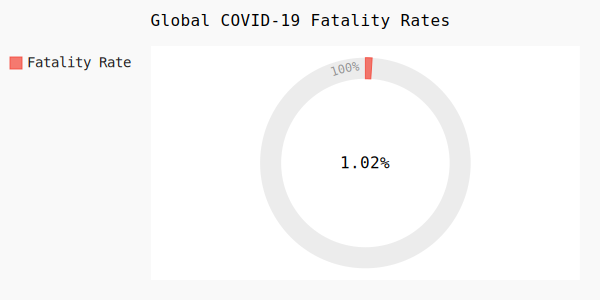

In [43]:
fatality_rate = round((most_recent_df["Deaths"].sum()/ most_recent_df["Confirmed Cases"].sum())*100,2)

gauge = pygal.SolidGauge(inner_radius=0.80, width=600,height=300)
percent_formatter = lambda x: '{:.10g}%'.format(x)
gauge.value_formatter = percent_formatter
gauge.title = "Global COVID-19 Fatality Rates"
gauge.add('Fatality Rate',[{'value':fatality_rate}])

display(SVG(gauge.render(disable_xml_declaration=True)))


Out of every 100 confirmed COVID-19 cases worldwide, about 1 person died
* Fatality Rate=COVID-19_confirmed/casesCOVID-19_deaths​×100

# 2. COUNTRY LEVEL


In [44]:
def fatality_rate(deaths,cases):
    fatality = (deaths/cases)*100
    return round(fatality,2)

In [45]:
country_data = most_recent_df.groupby('Country/Region')[['Confirmed Cases','Deaths']]\
              .sum()\
              .reset_index()

country_data['fatality_rate'] = country_data[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]),axis=1)

color_cases = 'OrRd'
color_death = 'OrRd'

cmap_country = country_data.sort_values('Confirmed Cases', ascending=False).reset_index(drop=True)\
                        .style.background_gradient(cmap=color_cases,subset=['Confirmed Cases'])\
                        .background_gradient(cmap = color_death,subset=['Deaths'])\
                        .background_gradient(cmap = color_death,subset=['fatality_rate'])
display((cmap_country))

,Country/Region,Confirmed Cases,Deaths,fatality_rate
0,USA,103802702,1123836,1.080000
1,India,44690738,530779,1.190000
2,France,39866718,166176,0.420000
3,Germany,38249060,168935,0.440000
4,Brazil,37076053,699276,1.890000
5,Japan,33320438,72997,0.220000
6,South Korea,30615522,34093,0.110000
7,Italy,25603510,188322,0.740000
8,United Kingdom,24656539,220721,0.900000
9,Russia,22075858,388478,1.760000


* This code produces a ranked, heat-mapped table of countries showing their confirmed cases, deaths, and computed fatality rates, letting you visually compare severity across countries.
*

# 3. EXPLORE THE SPREAD OF COVID-19 GEOGRAPHICALLY

In [46]:
!pip install -U kaleido

In [50]:
map_value = 'Confirmed Cases'
color = "YlGnBu"

def plotting_global_heatmap(country_data, map_value, color):
    temp = country_data[['Country/Region',map_value]]
    plot = px.choropleth(temp, locations='Country/Region',
                        color = np.log10(temp[map_value] + 1),
                        hover_name = 'Country/Region',
                        hover_data = [map_value],
                        color_continuous_scale = px.colors.sequential.Plasma, locationmode = "country names")
    plot.update_layout(title_text = "The Spread of COVID-19 {} Around The World".format(map_value), title_x=0.5,
                      height=350,margin={"r":30,"t":50,"l":0,"b":0})
    plot.update_coloraxes(colorbar_title="{} (Log Scale)".format(map_value),colorscale="YlGnBu")
    return plot

plot = plotting_global_heatmap(country_data,map_value,color)
plot.show()
pio.write_image(plot, "Heat Map Confirmed Cases.png", format = 'png', scale=3)
Image(pio.to_image(plot, format='png', scale=5))

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Countries had the highest vs lowest reported COVID-19 cases globally, with colors adjusted on a logarithmic scale so differences are visible across a wide range.

In [51]:
map_value = 'Deaths'
color = "YlOrRd"

def plotting_global_heatmap(country_data, map_value, color):
    temp = country_data[['Country/Region',map_value]]
    plot = px.choropleth(temp, locations='Country/Region',
                        color = np.log10(temp[map_value] + 1),
                        hover_name = 'Country/Region',
                        hover_data = [map_value],
                        color_continuous_scale = px.colors.sequential.Greys,
                         locationmode = "country names")
    plot.update_layout(title_text = "The Spread of COVID-19 {} Across The World".format(map_value),
                       title_x=0.5, height=400,margin={"r":30,"t":50,"l":0,"b":0})
    plot.update_coloraxes(colorbar_title="{}(Log Scale)".format(map_value),
                          colorscale = "YlOrRd")
    return plot

plot2 = plotting_global_heatmap(country_data,map_value,color)
plot2.show()
pio.write_image(plot2, "Heat Map Deaths.png", format = 'png', scale=5, height=400)
Image(pio.to_image(plot2, format='png', scale=4))

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


This map conveys where COVID-19 deaths were most concentrated worldwide, normalized with a log scale to highlight patterns across countries with vastly different magnitudes.

# 4. EXPLORE THE SPREAD OF COVID-19 IN TOP 10 COUNTRY


1. What are top 10 most-affected countries with the highest number of COVID-19 cases?
2. What are top 10 deathly countries with the highest number of COVID-19 fatalities?
3. Which worst affected countries had the highest fatality rate?
4. Which most deathly countries had the highest fatality rate ?

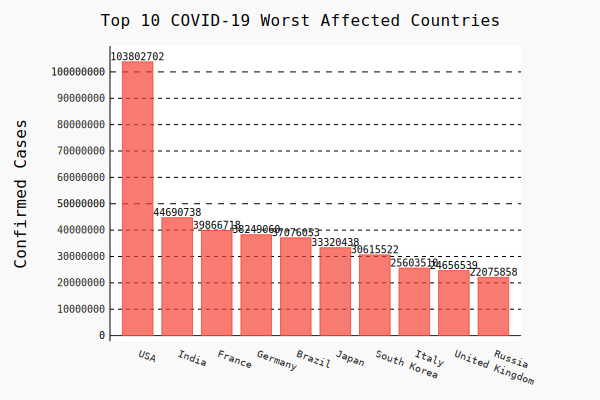

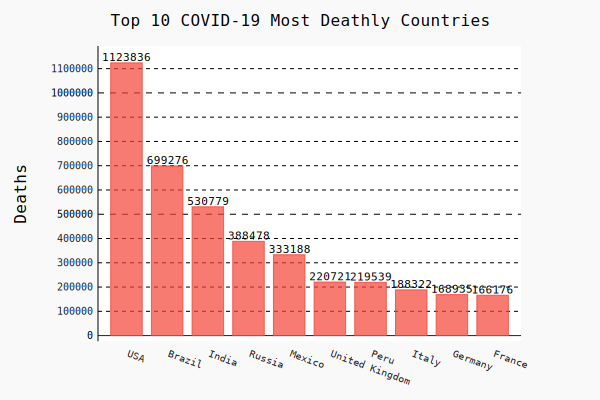

In [52]:
# TOP 10 COUNTRY BAR CHART
top10_country = country_data.sort_values('Confirmed Cases',ascending=False).head(10)

chart_cf = pygal.Bar(show_legend = False, human_readable = True, fill = True, width = 600,
    height = 400, x_label_rotation = 20, print_values = True, print_values_position = 'top',
    style = DefaultStyle(value_font_size = 10, value_colors=('black',)))
chart_cf.y_title = "Confirmed Cases"
chart_cf.title = 'Top 10 COVID-19 Worst Affected Countries'     # set chart title
chart_cf.x_labels = [i for i in top10_country['Country/Region']]  # label of country names
chart_cf.add('Confirmed Cases', top10_country['Confirmed Cases'])
display(SVG(chart_cf.render(disable_xml_declaration=True)))

top10_country_deaths = country_data.sort_values('Deaths',ascending=False).head(10)

from pygal.style import DarkSolarizedStyle, NeonStyle
chart_d = pygal.Bar(show_legend = False, human_readable = True, fill = True, width = 600,
    height = 400, x_label_rotation = 20, print_values = True, print_values_position = 'top',
    style = DefaultStyle(value_font_size = 11, value_colors=('black',)))
chart_d.y_title = "Deaths"
chart_d.title = 'Top 10 COVID-19 Most Deathly Countries'     # set chart title
chart_d.x_labels = [i for i in top10_country_deaths['Country/Region']]  # label of country names
chart_d.add('Confirmed Deaths', top10_country_deaths['Deaths'])
display(SVG(chart_d.render(disable_xml_declaration=True)))

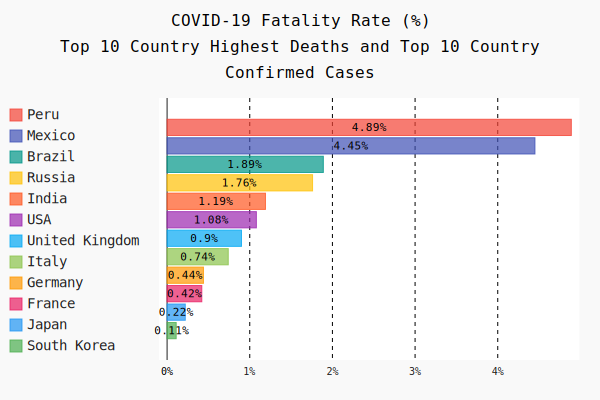

In [53]:
#### DATA PREP ###
# Calculate fatality rate for top 10 country with highest confirmed cases
top10_country['fatality_rate'] = top10_country[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]), axis=1)

# Calculate fatality rate for top 10 country with highest deaths
top10_country_deaths['fatality_rate'] = top10_country_deaths[['Confirmed Cases','Deaths']]\
        .apply(lambda row: fatality_rate(row["Deaths"], row["Confirmed Cases"]), axis=1)

# Combine data of country with highest confirmed cases and highest deaths
df_country_top10 = pd.concat([top10_country_deaths,top10_country]).drop_duplicates().sort_values('fatality_rate',
                                                                                                ascending=False)
chart_f = pygal.HorizontalBar(print_values=True, width = 600,
    height = 400,
                              style = DefaultStyle(value_font_size = 11, value_colors=('black',)))
percent_formatter = lambda x: '{:.10g}%'.format(x)
chart_f.value_formatter = percent_formatter
chart_f.title = "COVID-19 Fatality Rate (%)\n Top 10 Country Highest Deaths and Top 10 Country Confirmed Cases"
for country,rate in zip(df_country_top10["Country/Region"],
                        df_country_top10["fatality_rate"]):
    chart_f.add(country,rate)
display(SVG(chart_f.render(disable_xml_declaration=True)))

- The **United States** accounted for the world's **highest number of cases and deaths** at over 25.6M and 425K as of January 26th, 2020, according to CSSE data. Despite the highest number of deaths, the mortality rate in the US is only 1.67%.

- **Indian** came in **second place** with 10M infections and 153K deaths.

- In the list of the worst affected countries, **Brazil** came in third with more than 8M confirmed cases.

- **Russia, United Kingdom and France** came in as the third, fourth, and fifth place with relatively similar numbers of infections, over 3M

- **Spain, Italy, Turkey, and Germany**  came in as the last four places in top 10 most infected countries.

- In the list of the most deathly countries, Mexico came in fourth yet the fatality rate, reached 8.5%, of the countries ranked third in the world.

- In the list of the worst infected countries, Italy had the highest fatality rate of 3.48%.


# 5. TOP 10 FATALITY RATE COUNTRIES IN THE WORLD

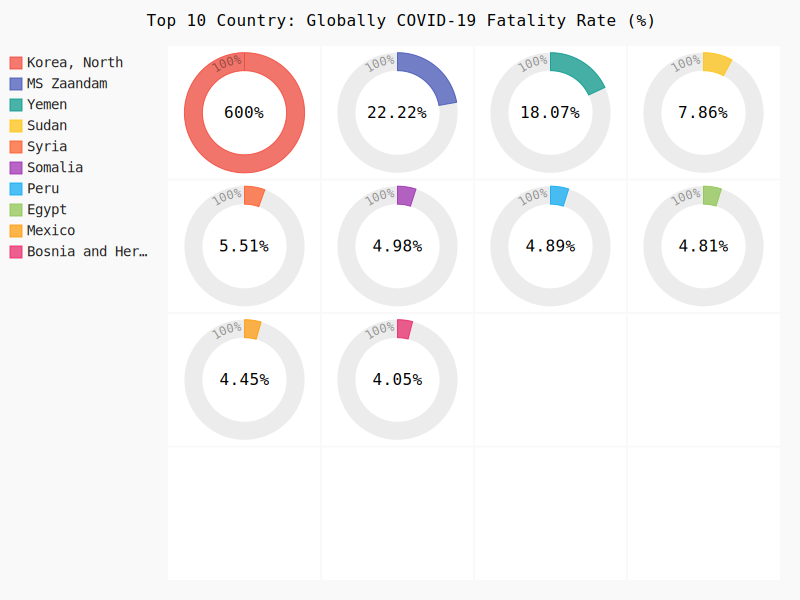

In [56]:
### Top 10 COVID-19 Fatality Rate (Globally)
top10_country_fatality = country_data.sort_values('fatality_rate',ascending=False).head(10)
### Top 10 COVID-19 Fatality Rate (Globally)
top10_country_fatality = country_data.sort_values('fatality_rate',ascending=False).head(10)

gauge_fatality = pygal.SolidGauge(inner_radius=0.70)
percent_formatter = lambda x: '{:.10g}%'.format(x)
gauge_fatality.value_formatter = percent_formatter
gauge_fatality.title = "Top 10 Country: Globally COVID-19 Fatality Rate (%)"
for country,rate in zip(top10_country_fatality["Country/Region"],
                        top10_country_fatality["fatality_rate"]):
    gauge_fatality.add(country,[{'value':rate}])
display(SVG(gauge_fatality.render(disable_xml_declaration=True)))

- Yemen came in as the first place with the highest fatality rate (29%). However, the country only totaled 612 deaths and 2115 cases.

- Though MS Zaandam has the second highest fatality rate of 22% but this country has significant small confirmed cases (9) and deaths(2).  

# 6. WORLDWIDE DETAIL REPORT SINCE THE EARLY STAGE OF PANDEMIC TILL NOW

In [64]:
world_cases_all_time = (
    df.groupby('Date')[['Confirmed Cases', 'Deaths']]
      .sum()
      .reset_index()
)

world_cases_all_time['Date'] = pd.to_datetime(world_cases_all_time['Date'])

world_cases_all_time = world_cases_all_time.sort_values("Date").reset_index(drop=True)

world_cases_all_time['New Cases'] = (
    world_cases_all_time['Confirmed Cases'].diff().fillna(0).astype(int)
)

world_cases_all_time.head()

,Date,Confirmed Cases,Deaths,New Cases
0,2020-01-22,557,17,0
1,2020-01-23,657,18,100
2,2020-01-24,944,26,287
3,2020-01-25,1437,42,493
4,2020-01-26,2120,56,683


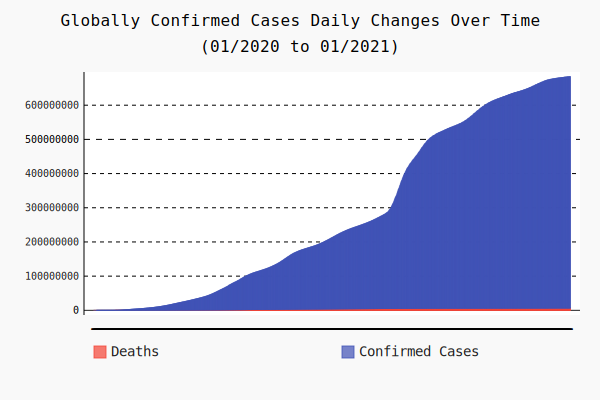

In [65]:
# STACKED BAR CHART
line_chart_cf = pygal.StackedBar(height=400, width=600, legend_at_bottom = True, interpolate='cubic')
line_chart_cf.title = 'Globally Confirmed Cases Daily Changes Over Time\n(01/2020 to 01/2021)'
line_chart_cf.x_labels = [str(i) for i in world_cases_all_time['Date']]
line_chart_cf.add('Deaths', [i for i in world_cases_all_time['Deaths']])
line_chart_cf.add('Confirmed Cases', [i for i in world_cases_all_time['Confirmed Cases']])
display(SVG(line_chart_cf.render(disable_xml_declaration=True)))

* Blue area = Confirmed Cases
* Represents the cumulative number of confirmed cases globally, growing steeply over time.
* By the end of the timeline, confirmed cases exceed 600 million.


* Red = Deaths
* Represents cumulative global deaths.
* Values are very small compared to total cases

It emphasizes the enormous difference in scale between infections and fatalities since both series are added as stacked bars, deaths are “stacked” on top of confirmed cases.

# 7. COUNTRY COMPARISON SINCE THE EARLY STAGE OF THE PANDEMIC

In [66]:
countries_cases_all_time = (
    df.groupby(['Date', 'Country/Region'])[['Confirmed Cases', 'Deaths']]
      .sum()
      .reset_index()
      .sort_values('Date')
)

top10_country = (
    country_data.sort_values('Confirmed Cases', ascending=False)
                .head(10)['Country/Region']
                .tolist()
)

print("Top 10 countries with highest confirmed cases are:\n\n{}".format(set(top10_country)))

top10_country_cases = countries_cases_all_time[
    countries_cases_all_time['Country/Region'].isin(top10_country)
].copy()

top10_country_cases['Date'] = pd.to_datetime(top10_country_cases['Date'])

top10_country_cases['Log(Confirmed Cases)'] = np.log1p(top10_country_cases['Confirmed Cases'])
top10_country_cases['Log(Deaths)']          = np.log1p(top10_country_cases['Deaths'])

top10_country_cases.head()

Top 10 countries with highest confirmed cases are:

{'France', 'South Korea', 'Italy', 'Germany', 'Russia', 'India', 'Brazil', 'Japan', 'USA', 'United Kingdom'}


,Date,Country/Region,Confirmed Cases,Deaths,Log(Confirmed Cases),Log(Deaths)
146,2021-01-01,Russia,3153960,56798,14.964170,10.947274
186,2021-01-01,USA,20397398,352844,16.830918,12.773784
190,2021-01-01,United Kingdom,2549667,95917,14.751474,11.471249
165,2021-01-01,South Korea,62593,942,11.044425,6.849066
24,2021-01-01,Brazil,7703971,195541,15.857247,12.183530


## Top 10 Wost Affected Countries Since The Early Stage of The Pandemic

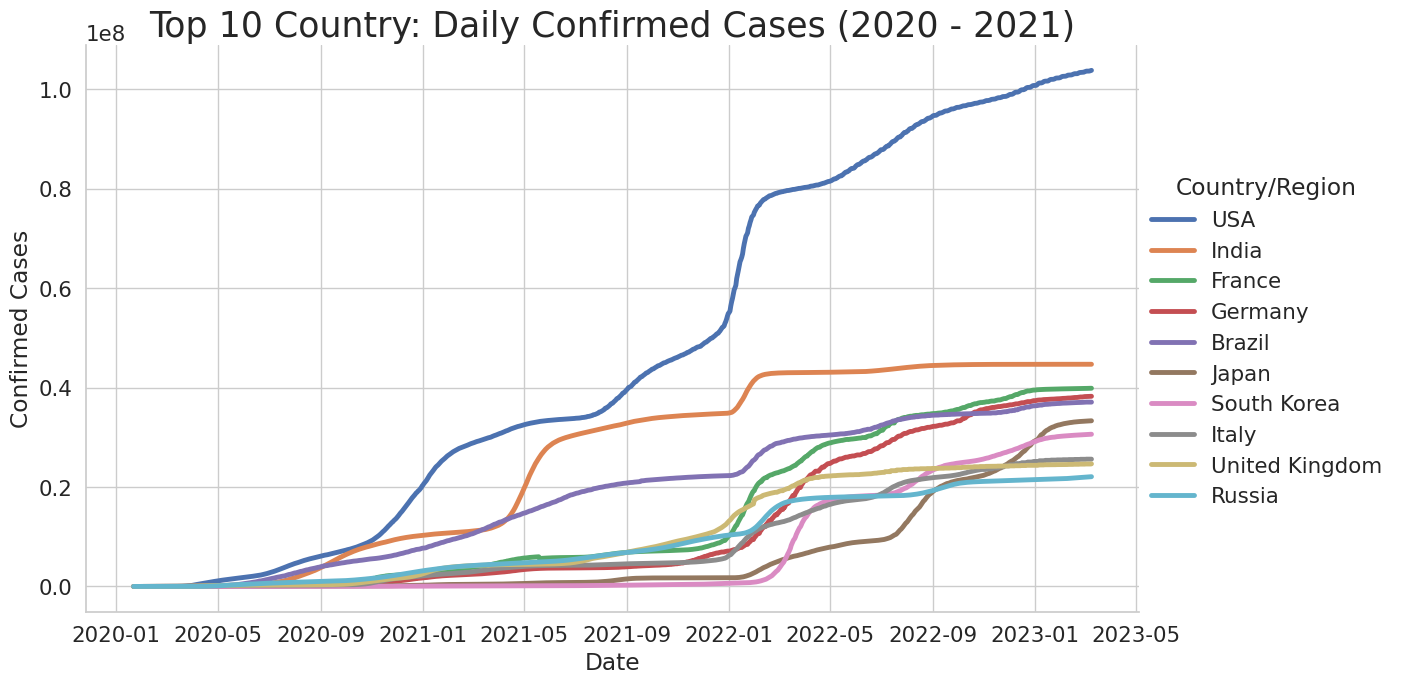

In [67]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,"axes.titlesize":25})
sns.relplot( data = top10_country_cases, x="Date", y="Confirmed Cases", hue="Country/Region", hue_order = top10_country,
    kind="line", height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Daily Confirmed Cases (2020 - 2021)")
plt.show();

Showing the true burden of COVID-19 in different countries.

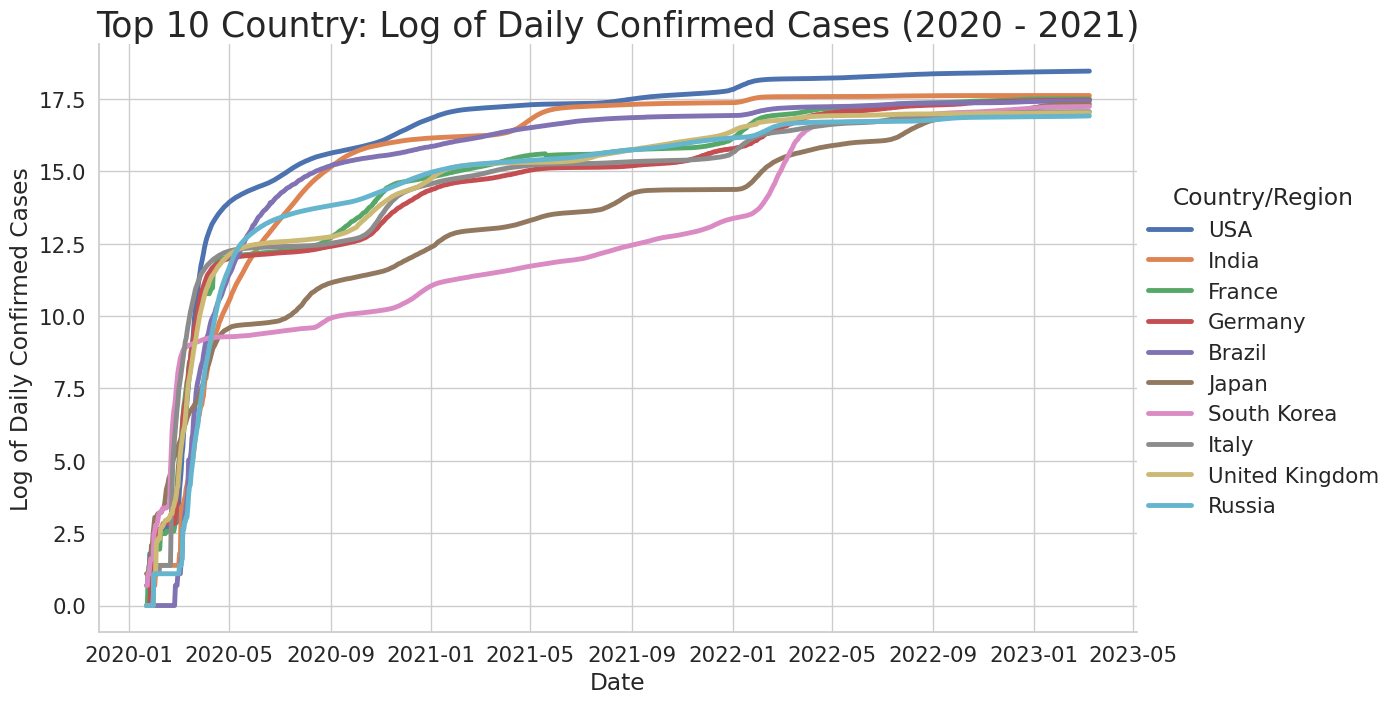

In [68]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5, "axes.titlesize":25})
sns.relplot(data = top10_country_cases, x="Date", y="Log(Confirmed Cases)", hue_order = top10_country, hue="Country/Region",
    kind="line", height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Log of Daily Confirmed Cases (2020 - 2021)", ylabel = 'Log of Daily Confirmed Cases')
plt.show();

Comparing pandemic growth patterns across countries of very different sizes.

## Have top 10 affected countries flattened the death curves ?

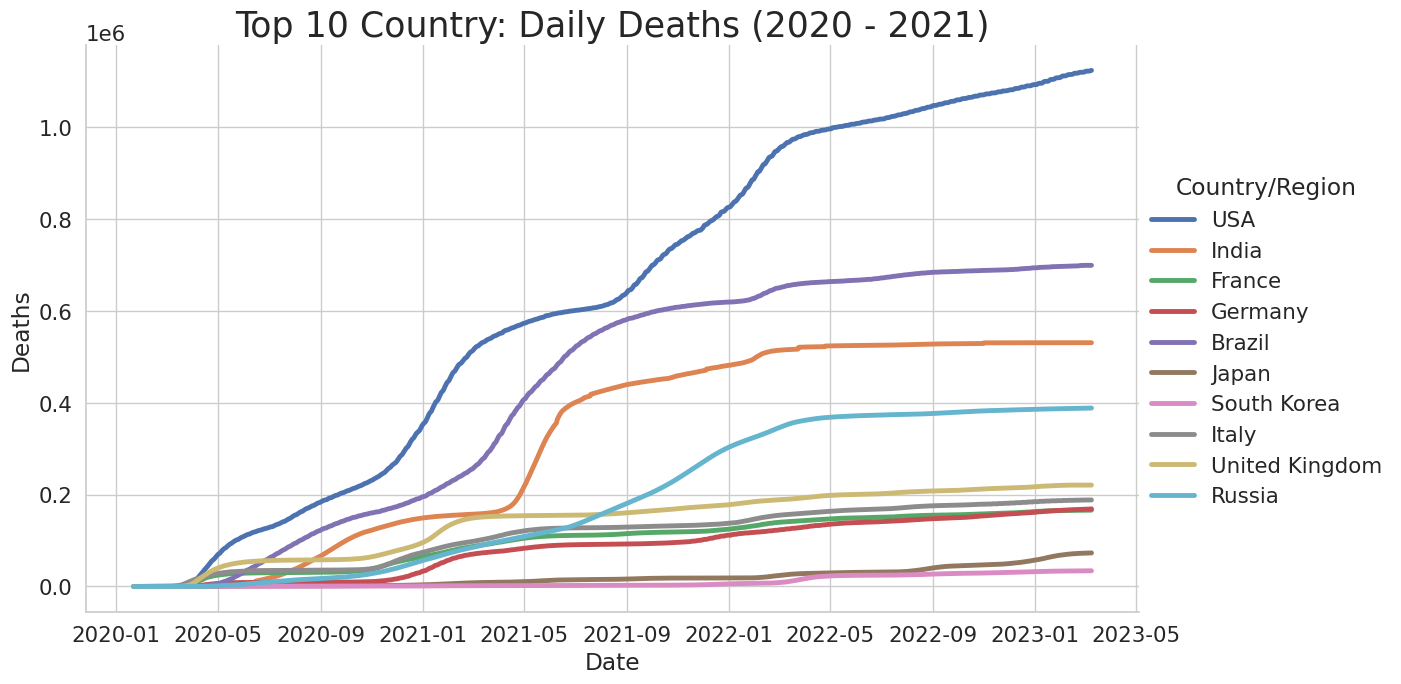

In [69]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,
                                               "axes.titlesize":25})
# Plot the deaths comparison between countries
sns.relplot(
    data = top10_country_cases, x="Date", y="Deaths",
    hue="Country/Region",
    hue_order = top10_country,
    kind="line",
    height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Daily Deaths (2020 - 2021)")
plt.show();

None of the top 10 countries have completely flattened their death curves (they all continue to rise, meaning deaths continued, just at slower rates).

However, some countries (India, Brazil, Russia) show a clear slowing of the slope after the big waves → partial flattening.

USA stands out with the steepest and most sustained rise, showing it struggled the most to reduce mortality trends.

Countries like Japan and South Korea had much flatter curves overall, indicating relatively lower death tolls despite waves of infections.

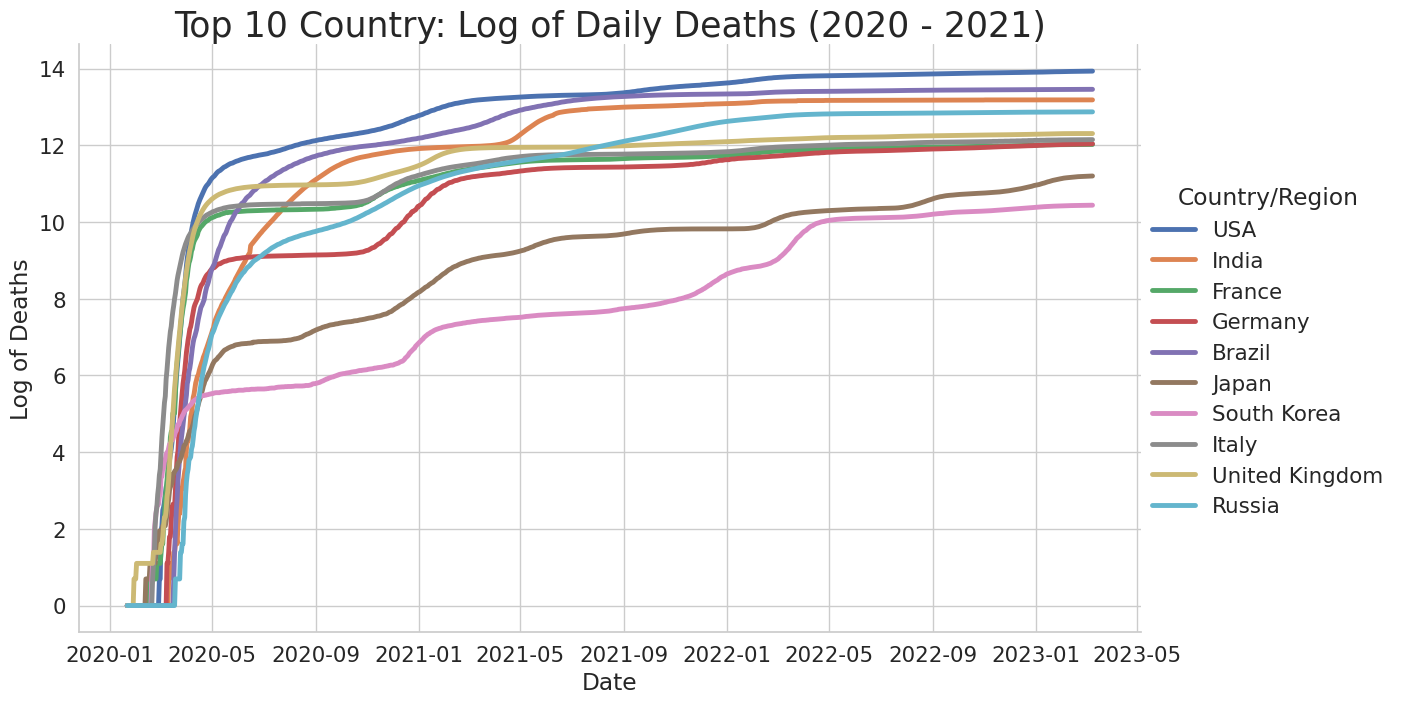

In [70]:
# Plot log deaths
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth":3.5,
                                               "axes.titlesize":25})
# Plot the log deaths comparison between countries
sns.relplot(
    data = top10_country_cases, x="Date", y="Log(Deaths)",
    hue="Country/Region",
    hue_order = top10_country,
    kind="line",
    height=7, aspect=1.7, facet_kws=dict(sharex=False))\
.set(title="Top 10 Country: Log of Daily Deaths (2020 - 2021)",
    ylabel = 'Log of Deaths')
plt.show();

This log-deaths chart conveys how quickly deaths were increasing (growth rates) rather than just the absolute burden.
While the USA and Brazil remained highest in total deaths, the shape of the curve (steep at first, flattening later) is shared across most countries.Japan and South Korea stand out as countries with consistently flatter trajectories even on the log scale, suggesting more effective control or lower fatality rates relative to cases.